# Школа глубокого обучения

<a href="https://mipt.ru/science/labs/laboratoriya-neyronnykh-sistem-i-glubokogo-obucheniya/"><img align="right" src="https://avatars1.githubusercontent.com/u/29918795?v=4&s=200" alt="DeepHackLab" style="position:relative;top:-40px;right:10px;height:100px;" /></a>



### Физтех-Школа Прикладной математики и информатики МФТИ 
### Лаборатория нейронных сетей и глубокого обучения (DeepHackLab)

## Домашнее задание 1
### Основы Python и пакет NumPy
---


In [1]:
import numpy as np
import random
import scipy.stats as sps

### Задача 1
В первой задаче вам предлагается перемножить две квадратные матрицы двумя способами -- без использования пакета ***numpy*** и с ним.

In [2]:
# Для генерации матриц используем фукнцию random -- она используется для генерации случайных объектов 
# функция sample создает случайную выборку. В качестве аргумента ей передается кортеж (i,j), здесь i -- число строк,
# j -- число столбцов.
a = np.random.sample((3,3))
b = np.random.sample((3,3))
# выведите размерность (ранг) каждой матрицы с помощью функции ndim.
# Используйте функцию shape, что она вывела?
# ========
print(np.ndim(a))
print(np.shape(a))
# тут можно писать код
# ========

2
(3, 3)


In [3]:
def mult(a, b):
    # здесь напишите перемножение матриц без 
    # использования NumPy и выведите результат
    result = np.zeros(a.shape)
    l = a.shape[0]
    for i in range(l):
        for j in range(l):
            result[i][j] = sum(a[i][r] * b[r][j] for r in range(l))
    return result

In [4]:
def np_mult(a, b):
    # здесь напишите перемножение матриц с
    # использованием NumPy и выведите результат
    return a @ b

In [5]:
%%time
# засечем время работы функции без NumPy
mult(a,b)

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 222 µs


array([[ 0.84852184,  1.46552831,  1.1510189 ],
       [ 0.9894348 ,  1.35783959,  0.49624114],
       [ 0.89019971,  1.49456684,  1.18791727]])

In [6]:
%%time
# засечем время работы функции с NumPy
np_mult(a,b)

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 461 µs


array([[ 0.84852184,  1.46552831,  1.1510189 ],
       [ 0.9894348 ,  1.35783959,  0.49624114],
       [ 0.89019971,  1.49456684,  1.18791727]])

### Задача 2
Напишите функцию, которая по данной последовательности $\{A_i\}_{i=1}^n$ строит последовательность $S_n$, где $S_k = \frac{A_1 + ... + A_k}{k}$.  
Аналогично -- с помощью библиотеки **NumPy** и без нее. Сравните скорость, объясните результат.

In [7]:
# функция, решающая задачу с помощью NumPy
def sec_av(A):
    return A.cumsum() / (np.indices(A.shape) + 1)

In [8]:
# функция без NumPy
def stupid_sec_av(A):
    S = [0 for i in range(len(A))]
    S[0] = A[0]
    for i in range(1, len(A)):
        S[i] = A[i] + S[i-1]
    for i in range(1, len(A)):
        S[i] /= i+1
    return S

In [9]:
# зададим некоторую последовательность и проверим ее на ваших функциях. 
# Первая функция должна работать ~ в 50 раз быстрее
A = sps.uniform.rvs(size=10 ** 7) 

%time S1 = sec_av(A)
%time S2 = stupid_sec_av(A)
# проверим корректность:
assert np.abs(S1 - S2).sum() == 0, "Results differ"

CPU times: user 328 ms, sys: 200 ms, total: 528 ms
Wall time: 530 ms
CPU times: user 17.7 s, sys: 300 ms, total: 18 s
Wall time: 18.1 s


### Задача 3

Пусть задан некоторый массив $X$. Надо построить новый массив, где все элементы с нечетными индексами требуется заменить на число $a$ (если оно не указано, то на 1). Все четные элементы исходного массива нужно возвести в куб и записать в обратном порядке относительно позиций этих элементов. Массив $X$ при этом должен остаться без изменений. В конце требуется слить массив X с преобразованным X и вывести в обратном порядке. 

In [10]:
# функция, решающая задачу с помощью NumPy
def transformation(X, a=1):
    res = X.copy()
    res[1::2] = a
    res[::2] = np.flipud(res[::2]) ** 3
    return np.flipud(np.hstack((X, res)))

In [11]:
# функция, решающая задачу  без NumPy
def stupid_transformation(X, a=1):
    res = [0 for i in range(len(X))]
    cubes = []
    for i, n in enumerate(X):
        if i%2 == 0:  # even
            cubes.append(n ** 3)
        else:         # odd
            res[i] = a
    res[::2] = reversed(cubes)
    return list(reversed(list(X) + res))

In [12]:
X = sps.uniform.rvs(size=10 ** 7) 
# здесь код эффективнее примерно в 20 раз. 
# если Вы вдруг соберетесь печатать массив без np -- лучше сначала посмотрите на его размер
%time S1 = transformation(X)
%time S2 = stupid_transformation(X)
# проверим корректность:
assert np.abs(S1 - S2).sum() == 0, "Results differ"

CPU times: user 952 ms, sys: 120 ms, total: 1.07 s
Wall time: 1.07 s
CPU times: user 18.3 s, sys: 740 ms, total: 19.1 s
Wall time: 19.2 s


Почему методы ***numpy*** оказываются эффективнее?

**Ответ**: `numpy` гораздо эффективнее, так как `numpy` почти польностью написан на чистом `C` с помощью `Python C API.`

## Дополнительные задачи

Дополнительные задачи подразумевают, что Вы самостоятельно разберётесь в некоторых функциях ***numpy***, чтобы их сделать.  

Эти задачи не являются обязательными, но могут повлиять на Ваш рейтинг в лучшую сторону (точные правила учёта доп. задач будут оглашены позже).

### Задача 4*

Дана функция двух переменных: $f(x, y) = sin(x)cos(y)$ (это просто такой красивый 3D-график), а также дана функция для отрисовки $f(x, y)$ (`draw_f()`), которая принимает на вход двумерную сетку, на которой будет вычисляться функция.  

Вам нужно разобраться в том, как строить такие сетки (подсказка - это одна конкретная функция ***numpy***), и подать такую сетку на вход функции отрисовки.

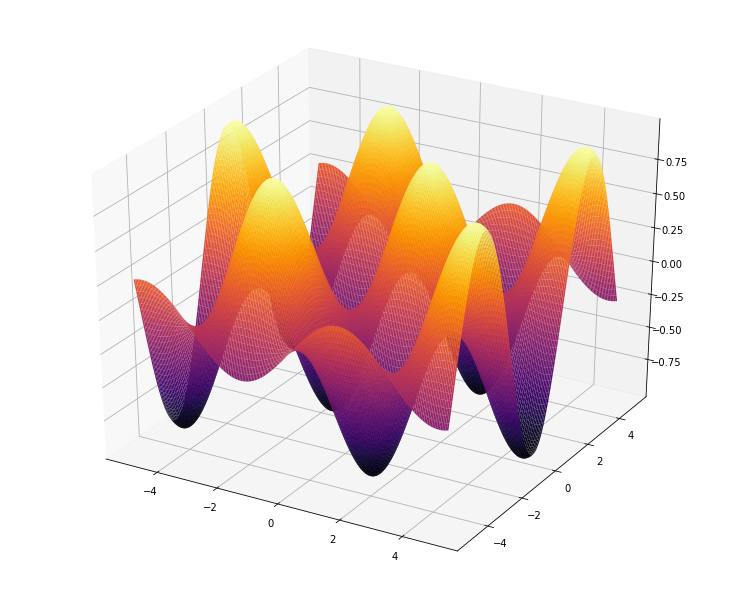

In [13]:
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

def f(x, y):
    '''Функция двух переменных'''
    return np.sin(x) * np.cos(y)

def draw_f(grid_x, grid_y):
    '''Функция отрисовки функции f(x, y)'''
    fig = plt.figure(figsize=(10, 8))
    ax = Axes3D(fig)
    ax.plot_surface(grid_x, grid_y, f(grid_x, grid_y),
                    cmap='inferno', rcount=200, ccount=200, linewidth=0)
    
    plt.show()

gridx, gridy = np.meshgrid(np.linspace(-5, 5, 200), np.linspace(-5, 5, 200))

draw_f(gridx, gridy)

### Задача 5*

Вам дана картинка. При загрузке её размерность равна 3: **(w, h, num_channels)**, где **w** - ширина картинки в пикселях, **h** - высота картинки в пикселях, **num_channels** - количество каналов *(R, G, B, alpha)*.

Вам нужно "развернуть" картинку в одномерный массив размера w \* h \* num_channels, написав **одну строку кода**.

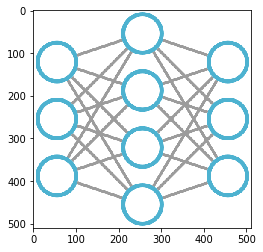

In [14]:
path_to_image = './image.png'
image_array = plt.imread(path_to_image)
plt.imshow(image_array)

In [15]:
flat_image_array = image_array.flatten()
print(flat_image_array.size)

1040400
